# 3. Neural Network Architecture and Hyperparameters

Hyperparameters are parameters, often chosen by the user, that control model training. The type of activation function, the number of layers in the model, and the learning rate are all hyperparameters of neural network training. Together, we will discover the most critical hyperparameters of a neural network and how to modify them.

### Preparing environment

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

from environment import prepare_environment

In [2]:
SEED = 42
prepare_environment()

### Check if your GPU driver and CUDA is enabled and accessible by PyTorch

In [3]:
torch.cuda.is_available()

True

## 3.1 Discovering activation functions between layers

### Discovering activation functions between layers

- Rectified Linear Unit (ReLU): `f(x) = max(x, 0)`
- for positive inputs, the output is equal to the input
- for strictly negative inputs, the output is equal to zero
- overcomes the vanishing gradients problem

In [4]:
relu = nn.ReLU()
relu

ReLU()

### Introducing Leaky ReLU

- For positive inputs, it behaves similarly to ReLU
- For negative inputs, it multiplies the input by a small coefficient (defaulted to 0.01)
- The gradients for negative inputs are never null

In [5]:
leaky_relu = nn.LeakyReLU(negative_slope = 0.05)  # default negative_slope=0.01
leaky_relu

LeakyReLU(negative_slope=0.05)

### Ex.1 - Implementing ReLU

The rectified linear unit (or ReLU) function is one of the most common activation functions in deep learning.

It overcomes the training problems linked with the sigmoid function you learned, such as the vanishing gradients problem.

In this exercise, you'll begin with a ReLU implementation in PyTorch. Next, you'll calculate the gradients of the function.

The nn module has already been imported for you.

**Instructions**

1. Create a ReLU function in PyTorch.
2. Calculate the gradient of the ReLU function for x using the relu_pytorch() function you defined, then running a backward pass.
3. Find the gradient at x.

In [6]:
# Create a ReLU function with PyTorch
relu_pytorch = nn.ReLU()

# Apply your ReLU function on x, and calculate gradients
x = torch.tensor(-1.0, requires_grad=True)
y = relu_pytorch(x)
y.backward()

# Print the gradient of the ReLU function for x
gradient = x.grad
print(gradient)

tensor(0.)


### Ex.2 - Implementing leaky ReLU

You've learned that ReLU is one of the most used activation functions in deep learning. You will find it in modern architecture. However, it does have the inconvenience of outputting null values for negative inputs and therefore, having null gradients. Once an element of the input is negative, it will be set to zero for the rest of the training. Leaky ReLU overcomes this challenge by using a multiplying factor for negative inputs.

In this exercise, you will implement the leaky ReLU function in NumPy and PyTorch and practice using it. The numpy as np package, the torch package as well as the torch.nn as nn have already been imported.

**Instructions**

1. Create a leaky ReLU function in PyTorch with a negative slope of 0.05.
2. Call the function on the tensor x, which has already been defined for you.
3. For a negative slope of 0.05 and an input value of -3, what is the output of the leaky ReLU function?

In [7]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope = 0.05)

x = torch.tensor(-2.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

tensor(-0.1000)


In [8]:
x = torch.tensor(-3.0)
leaky_relu_pytorch(x)

tensor(-0.1500)

## 3.2 A deeper dive into neural network architecture

### Counting the number of parameters

In [9]:
# Tweaking the number of hidden layers
n_features = 5
n_classes = 3

model = nn.Sequential(
    nn.Linear(n_features, 8),
    nn.Linear(8, 4),
    nn.Linear(4, n_classes)
)

# `.numel()` returns the number of elements in the tensor
total = 0
for parameter in model.parameters():
    total += parameter.numel()
print(total)  # (n_features+1)*8 + (8+1)*4 + (4+1)*n_classes

99


### Ex.3 - Counting the number of parameters
Deep learning models are famous for having a lot of parameters. Recent language models have billions of parameters. With more parameters comes more computational complexity and longer training times, and a deep learning practitioner must know how many parameters their model has.

In this exercise, you will calculate the number of parameters in your model, first using PyTorch then manually.

The torch.nn package has been imported as nn.

**Instructions**

1. Iterate through the model's parameters to update the total variable with the total number of parameters in the model.

In [10]:
model = nn.Sequential(
    nn.Linear(16, 4),
    nn.Linear(4, 2),
    nn.Linear(2, 1)
)

total = 0

# Calculate the number of parameters in the model
for p in model.parameters():
  total += p.numel()

print(total)

81


### Ex. 4 - Manipulating the capacity of a network
In this exercise, you will practice creating neural networks with different capacities. The capacity of a network reflects the number of parameters in said network. To help you, a calculate_capacity() function has been implemented, as follows:
```
def calculate_capacity(model):
  total = 0
  for p in model.parameters():
    total += p.numel()
  return total
```

This function returns the number of parameters in your model.

The dataset you are training this network on has `n_features` features and `n_classes` classes. The torch.nn package has been imported as nn.

**Instructions**
1. Create a neural network with exactly three linear layers and less than 120 parameters, which takes n_features as inputs and outputs n_classes.
2. Create a neural network with exactly four linear layers and more than 120 parameters, which takes n_features as inputs and outputs n_classes.

In [11]:
# Utilities
def calculate_capacity(model):
    total = 0
    for p in model.parameters():
        total += p.numel()
    return total

In [12]:
n_features = 8
n_classes = 2

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Create a neural network with less than 120 parameters
model = nn.Sequential(
    nn.Linear(n_features, 6),
    nn.Linear(6, 4),
    nn.Linear(4, n_classes)
)
output = model(input_tensor)

print(calculate_capacity(model))

92


In [13]:
n_features = 8
n_classes = 2

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Create a neural network with more than 120 parameters
model = nn.Sequential(
    nn.Linear(n_features, 16),
    nn.Linear(16, 8),
    nn.Linear(8, 4),
    nn.Linear(4, n_classes)
)
output = model(input_tensor)

print(calculate_capacity(model))

326


## 3.3 Learning rate and momentum

### Updating weights with SGD

In [14]:
# lr - Typical values between 10 and 10
# momentum - Typical values between 0.85 and 0.99
sgd = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)  
sgd

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.95
    nesterov: False
    weight_decay: 0
)

### Ex.5 - Experimenting with learning rate
In this exercise, your goal is to find the optimal learning rate such that the optimizer can find the minimum of the non-convex function $ X^4 + x^3 - 5X^2 $ in ten steps.

You will experiment with three different learning rate values. For this problem, try learning rate values between `0.001` to `0.1`.

You are provided with the `optimize_and_plot()` function that takes the learning rate for the first argument. This function will run 10 steps of the SGD optimizer and display the results.

**Instructions**

1. Try a small learning rate value such that the optimizer isn't able to get past the first minimum on the right.
2. Try a large learning rate value such that the optimizer skips past the global minimum at -2.
3. Based on the previous results, try a better learning rate value.

In [15]:
# Utilities
def function(x):
    return x**4 + x**3 - 5*x**2

def optimize_and_plot(lr=0.01, momentum=0.0, ditto=10):
    """Visualize the evolution of the optimizer function given the learning rate and momentun"""
    x = torch.tensor(2.0, requires_grad=True)
    buffer = torch.zeros_like(x.data)
    values = []
    for i in range(ditto):
        y = function(x)
        values.append((x.clone(), y.clone()))
        y.backward()
  
        d_p = x.grad.data
        if momentum !=0 :
            buffer.mul_(momentum).add_(d_p)
            d_p = buffer
  
        x.data.add_(d_p, alpha=-lr)
        x.grad.zero_()
        
    x = np.arange(-3, 2, 0.001)
    y = function(x)
  
    plt.figure(figsize=(10, 6))
    plt.plot([v[0].detach().numpy() for v in values], 
             [v[1].detach().numpy() for v in values], 
             'r-X', linewidth=2, markersize=7)
    for i in range(10):
        plt.text(values[i][0]+0.1, 
                 values[i][1], 
                 f'step {i}', fontdict={'size': 5, 'color': 'r'})
    plt.plot(x, y, linewidth=2)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.legend(['Optimizer steps', 'Square function'])
    plt.show()

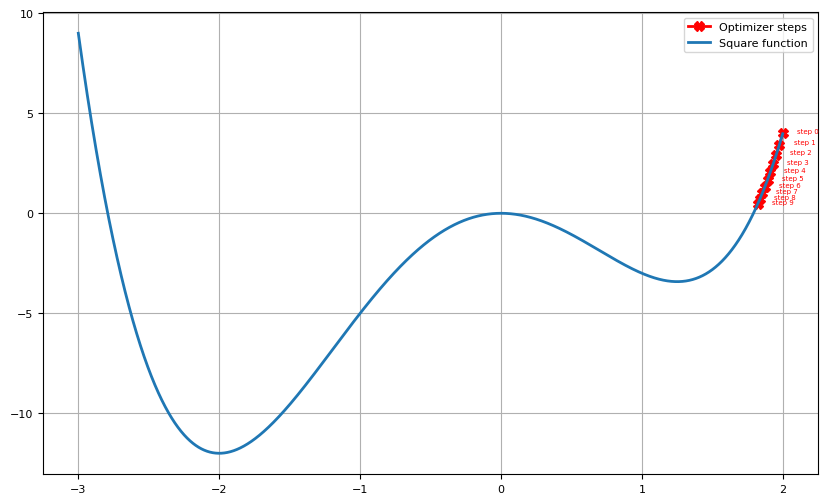

In [16]:
# 1. Try a small learning rate value such that the optimizer isn't able to 
#    get past the first minimum on the right.
lr0 = 0.001
optimize_and_plot(lr=lr0)

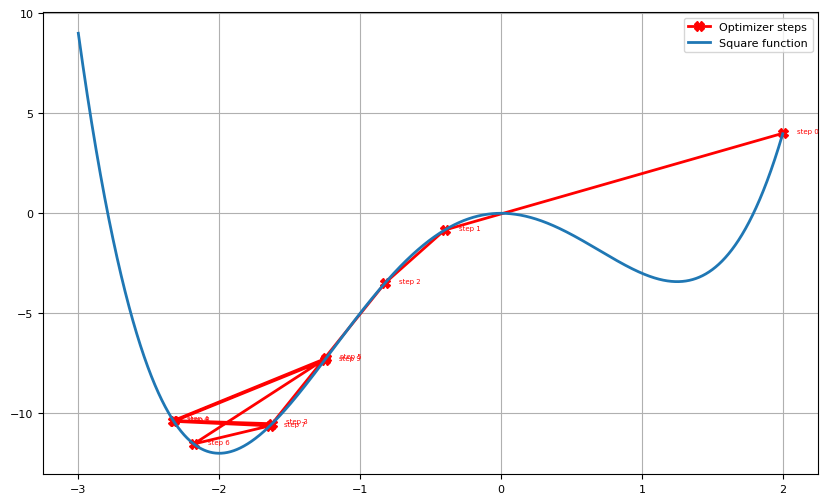

In [17]:
# 2. Try a large learning rate value such that the optimizer skips past the 
#    global minimum at -2
lr1 = .1
optimize_and_plot(lr=lr1)

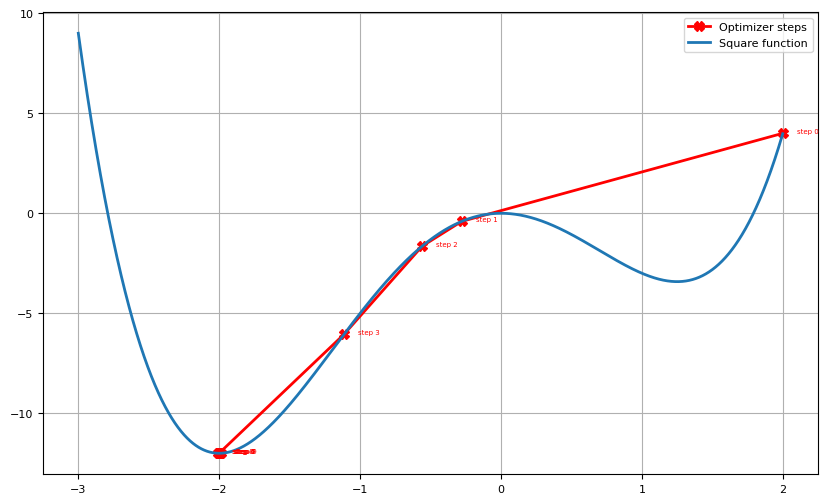

In [18]:
# 3. Based on the previous results, try a better learning rate value
lr2 = 0.095
optimize_and_plot(lr=lr2)

#### Reviewing in detail the function `optimize_and_plot`

In [19]:
# Reproducibility
torch.manual_seed(SEED)

# Reviewing in details
x = torch.tensor(2.0, requires_grad=True)
buffer = torch.zeros_like(x.data)
lr=0.01
momentum=0.
ditto = 10
print(f"x: {x}, \tbuffer: {buffer}")

values = []
for i in range(ditto):
    y = function(x)
    values.append((x.clone(), y.clone()))
    y.backward()

    # Tensor.grad - This attribute is None by default and becomes a Tensor
    # the first time a call to backward() computes gradients for self.
    # The attribute will then contain the gradients computed and future
    # calls to backward() will accumulate (add) gradients into it.
    d_p = x.grad.data
    print(f"{i}: \tx: {x}, \ty:{y}, \td_p:{d_p}")
    if momentum !=0 :
        buffer.mul_(momentum).add_(d_p)
        d_p = buffer
        print(f"{i}b: \tx: {x}, \ty:{y}, \td_p:{d_p}")
    
    x.data.add_(d_p, alpha=-lr)
    # Tensor.zero_() - It fills self tensor with zeros.
    # It is beneficial to zero out gradients when building a neural network.
    # This is because by default, gradients are accumulated in buffers
    # (i.e, not overwritten) whenever .backward() is called.
    x.grad.zero_()
print(x)

x = np.arange(-3, 2, 0.001)
y = function(x)
print(f"x: {x}, \ty: {y}")
[(round(v[0].data.item(), 2), round(v[1].data.item())) for v in values]

x: 2.0, 	buffer: 0.0
0: 	x: 2.0, 	y:4.0, 	d_p:24.0
1: 	x: 1.7599999904632568, 	y:-0.4410982131958008, 	d_p:13.499903678894043
2: 	x: 1.6250009536743164, 	y:-1.9392004013061523, 	d_p:8.835968017578125
3: 	x: 1.536641240119934, 	y:-2.6023330688476562, 	d_p:6.231064796447754
4: 	x: 1.4743305444717407, 	y:-2.938817024230957, 	d_p:4.596363067626953
5: 	x: 1.4283668994903564, 	y:-3.124413013458252, 	d_p:3.4938268661499023
6: 	x: 1.3934286832809448, 	y:-3.232696533203125, 	d_p:2.7128095626831055
7: 	x: 1.3663005828857422, 	y:-3.298449993133545, 	d_p:2.139641761779785
8: 	x: 1.3449041843414307, 	y:-3.339578628540039, 	d_p:1.7077350616455078
9: 	x: 1.3278268575668335, 	y:-3.3658900260925293, 	d_p:1.3755979537963867
tensor(1.3141, requires_grad=True)
x: [-3.    -2.999 -2.998 ...  1.997  1.998  1.999], 	y: [9.         8.94903999 8.89815991 ... 3.92822476 3.95209993 3.97602499]


[(2.0, 4),
 (1.76, 0),
 (1.63, -2),
 (1.54, -3),
 (1.47, -3),
 (1.43, -3),
 (1.39, -3),
 (1.37, -3),
 (1.34, -3),
 (1.33, -3)]

In [20]:
# Reproducibility
torch.manual_seed(SEED)

# Add method
a = torch.randn(4)
print(a)
print(torch.add(a, 20))
print(torch.add(a, 20, alpha=0.1))

tensor([0.3367, 0.1288, 0.2345, 0.2303])
tensor([20.3367, 20.1288, 20.2345, 20.2303])
tensor([2.3367, 2.1288, 2.2345, 2.2303])


### Ex.6 - Experimenting with momentum
In this exercise, your goal is to find the optimal momentum such that the optimizer can find the minimum of the following non-convex function $ X^4 + x^3 - 5X^2 $ in 20 steps. You will experiment with two different momentum values. For this problem, the learning rate is fixed at `0.01`.

You are provided with the `optimize_and_plot()` function that takes the learning rate for the first argument. This function will run 20 steps of the SGD optimizer and display the results.

**Instructions**
1. Try a first value for the momentum such that the optimizer gets stuck in the first minimum.
2. Try a second value for the momentum such that the optimizer finds the global optimum.

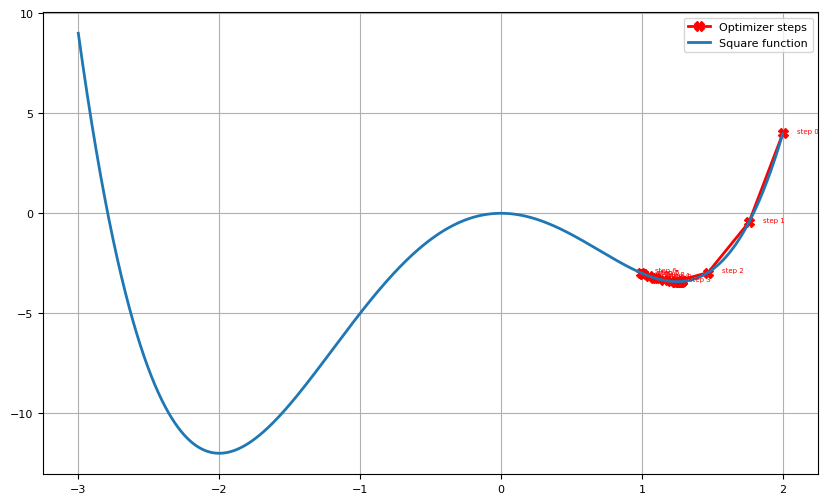

In [21]:
# 1. Try a first value for the momentum such that the optimizer gets stuck in the first minimum.
mom0 = 0.65
optimize_and_plot(momentum=mom0, ditto=20)

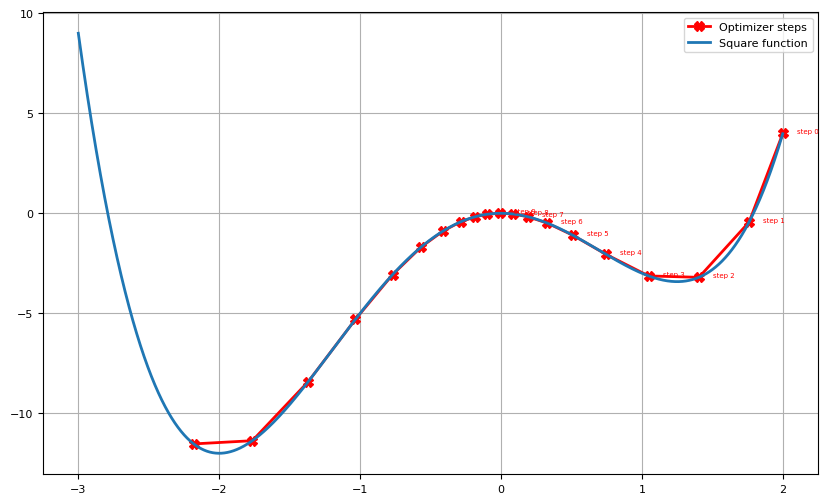

In [22]:
# 2. Try a second value for the momentum such that the optimizer finds the global optimum.
mom1 = 0.92
optimize_and_plot(momentum=mom1, ditto=20)

## 3.4 Layer initialization and transfer learning

### Layer initialization

In [23]:
layer = nn.Linear(64, 128)
print(layer.weight.min(), layer.weight.max())

nn.init.uniform_(layer.weight)
print(layer.weight.min(), layer.weight.max())

tensor(-0.1250, grad_fn=<MinBackward1>) tensor(0.1250, grad_fn=<MaxBackward1>)
tensor(2.2054e-06, grad_fn=<MinBackward1>) tensor(0.9999, grad_fn=<MaxBackward1>)


### Transfer learning and fine tuning

In [24]:
layer = nn.Linear(64, 128)
print(layer.weight.min(), layer.weight.max())

tensor(-0.1250, grad_fn=<MinBackward1>) tensor(0.1250, grad_fn=<MaxBackward1>)


In [25]:
# Saving weights
torch.save(layer, 'model-artifact/layer.pth')

In [26]:
!dir model-artifact /b

layer.pth


In [27]:
new_layer = torch.load('model-artifact/layer.pth', weights_only=False)
print(layer.weight.min(), layer.weight.max())

tensor(-0.1250, grad_fn=<MinBackward1>) tensor(0.1250, grad_fn=<MaxBackward1>)


### Transfer learning and fine-tuning

In [28]:
model = nn.Sequential(
    nn.Linear(64, 128),
    nn.Linear(128, 256)
)

for name, param in model.named_parameters():
    if name == '0.weight':
        param.requires_grad = False

### Ex.7 - Freeze layers of a model

You are about to fine-tune a model on a new task after loading pre-trained weights. The model contains three linear layers. However, because your dataset is small, you only want to train the last linear layer of this model and freeze the first two linear layers.

The model has already been created and exists under the variable model. You will be using the named_parameters method of the model to list the parameters of the model. Each parameter is described by a name. This name is a string with the following naming convention: x.name where x is the index of the layer.

Remember that a linear layer has two parameters: the weight and the bias.

**Instructions**

1. Use an if statement to determine if the parameter should be frozen or not based on its name.
2. Freeze the parameters of the first two layers of this model.

In [29]:
model = nn.Sequential(
    nn.Linear(8, 16),
    nn.Linear(16, 32),
    nn.Linear(32, 10)
)

for name, para in model.named_parameters():
    # Check if the parameters belong to the first layer
    if name == '0.weight' or name == '0.bias':
        # Freeze the parameters
        param.requires_grad = False
    # Check if the parameters belong to the second layer
    if name == '1.weight' or name == '1.bias':
        # Freeze the parameters
        param.requires_grad = False

### Ex.8 - Layer initialization

The initialization of the weights of a neural network has been the focus of researchers for many years. When training a network, the method used to initialize the weights has a direct impact on the final performance of the network.

As a machine learning practitioner, you should be able to experiment with different initialization strategies. In this exercise, you are creating a small neural network made of two layers and you are deciding to initialize each layer's weights with the uniform method.

**Instructions**
1. For each layer (layer0 and layer1), use the uniform initialization method to initialize the weights.

In [30]:
layer0 = nn.Linear(16, 32)
layer1 = nn.Linear(32, 64)

# Use uniform initialization for layer0 and layer1 weights
nn.init.uniform_(layer0.weight)
nn.init.uniform_(layer1.weight)

model = nn.Sequential(layer0, layer1)

----------------------------------------